In [1]:
%matplotlib inline
import sys
sys.path.append("../")
sys.path.append('/home/hao/Research/probtorch/')
import numpy as np
import matplotlib.pyplot as plt
from plots import *
from utils import *
from training import *
from model_mu import *
import time
import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
Data = torch.from_numpy(np.load('../rings_fixed_radius/obs.npy')).float()
## Data Parameters
N = 300
K = 3
D = 2
FIXED_RADIUS = 1.5
## Model Parameters
MCMC_SIZE = 10
SAMPLE_SIZE = 10
NUM_HIDDEN_GLOBAL = 8
NUM_HIDDEN_LOCAL = 64
STAT_SIZE = 8
NUM_LATENTS =  D
## Training Parameters
BATCH_SIZE = 20
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3
CUDA = torch.cuda.is_available()
PATH = 'ag-mu-idw-v1'
DEVICE = torch.device('cuda:1')

In [3]:
enc_mu, enc_z, optimizer = initialize(NUM_HIDDEN_GLOBAL, STAT_SIZE, NUM_HIDDEN_LOCAL, K, D, CUDA, DEVICE, LEARNING_RATE)

In [4]:
# enc_mu.load_state_dict(torch.load("../weights/enc-mu-%s" % PATH))
# enc_z.load_state_dict(torch.load("../weights/enc-z-%s" % PATH))

In [ ]:
train(Eubo_mu, enc_mu, enc_z, optimizer, Data, FIXED_RADIUS, K, NUM_EPOCHS, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE, PATH, CUDA, DEVICE)

In [ ]:
torch.save(enc_mu.state_dict(), "../weights/enc-mu-%s" % PATH)
torch.save(enc_z.state_dict(), "../weights/enc-z-%s" % PATH)

CPU times: user 4.67 s, sys: 35.8 ms, total: 4.71 s
Wall time: 4.7 s


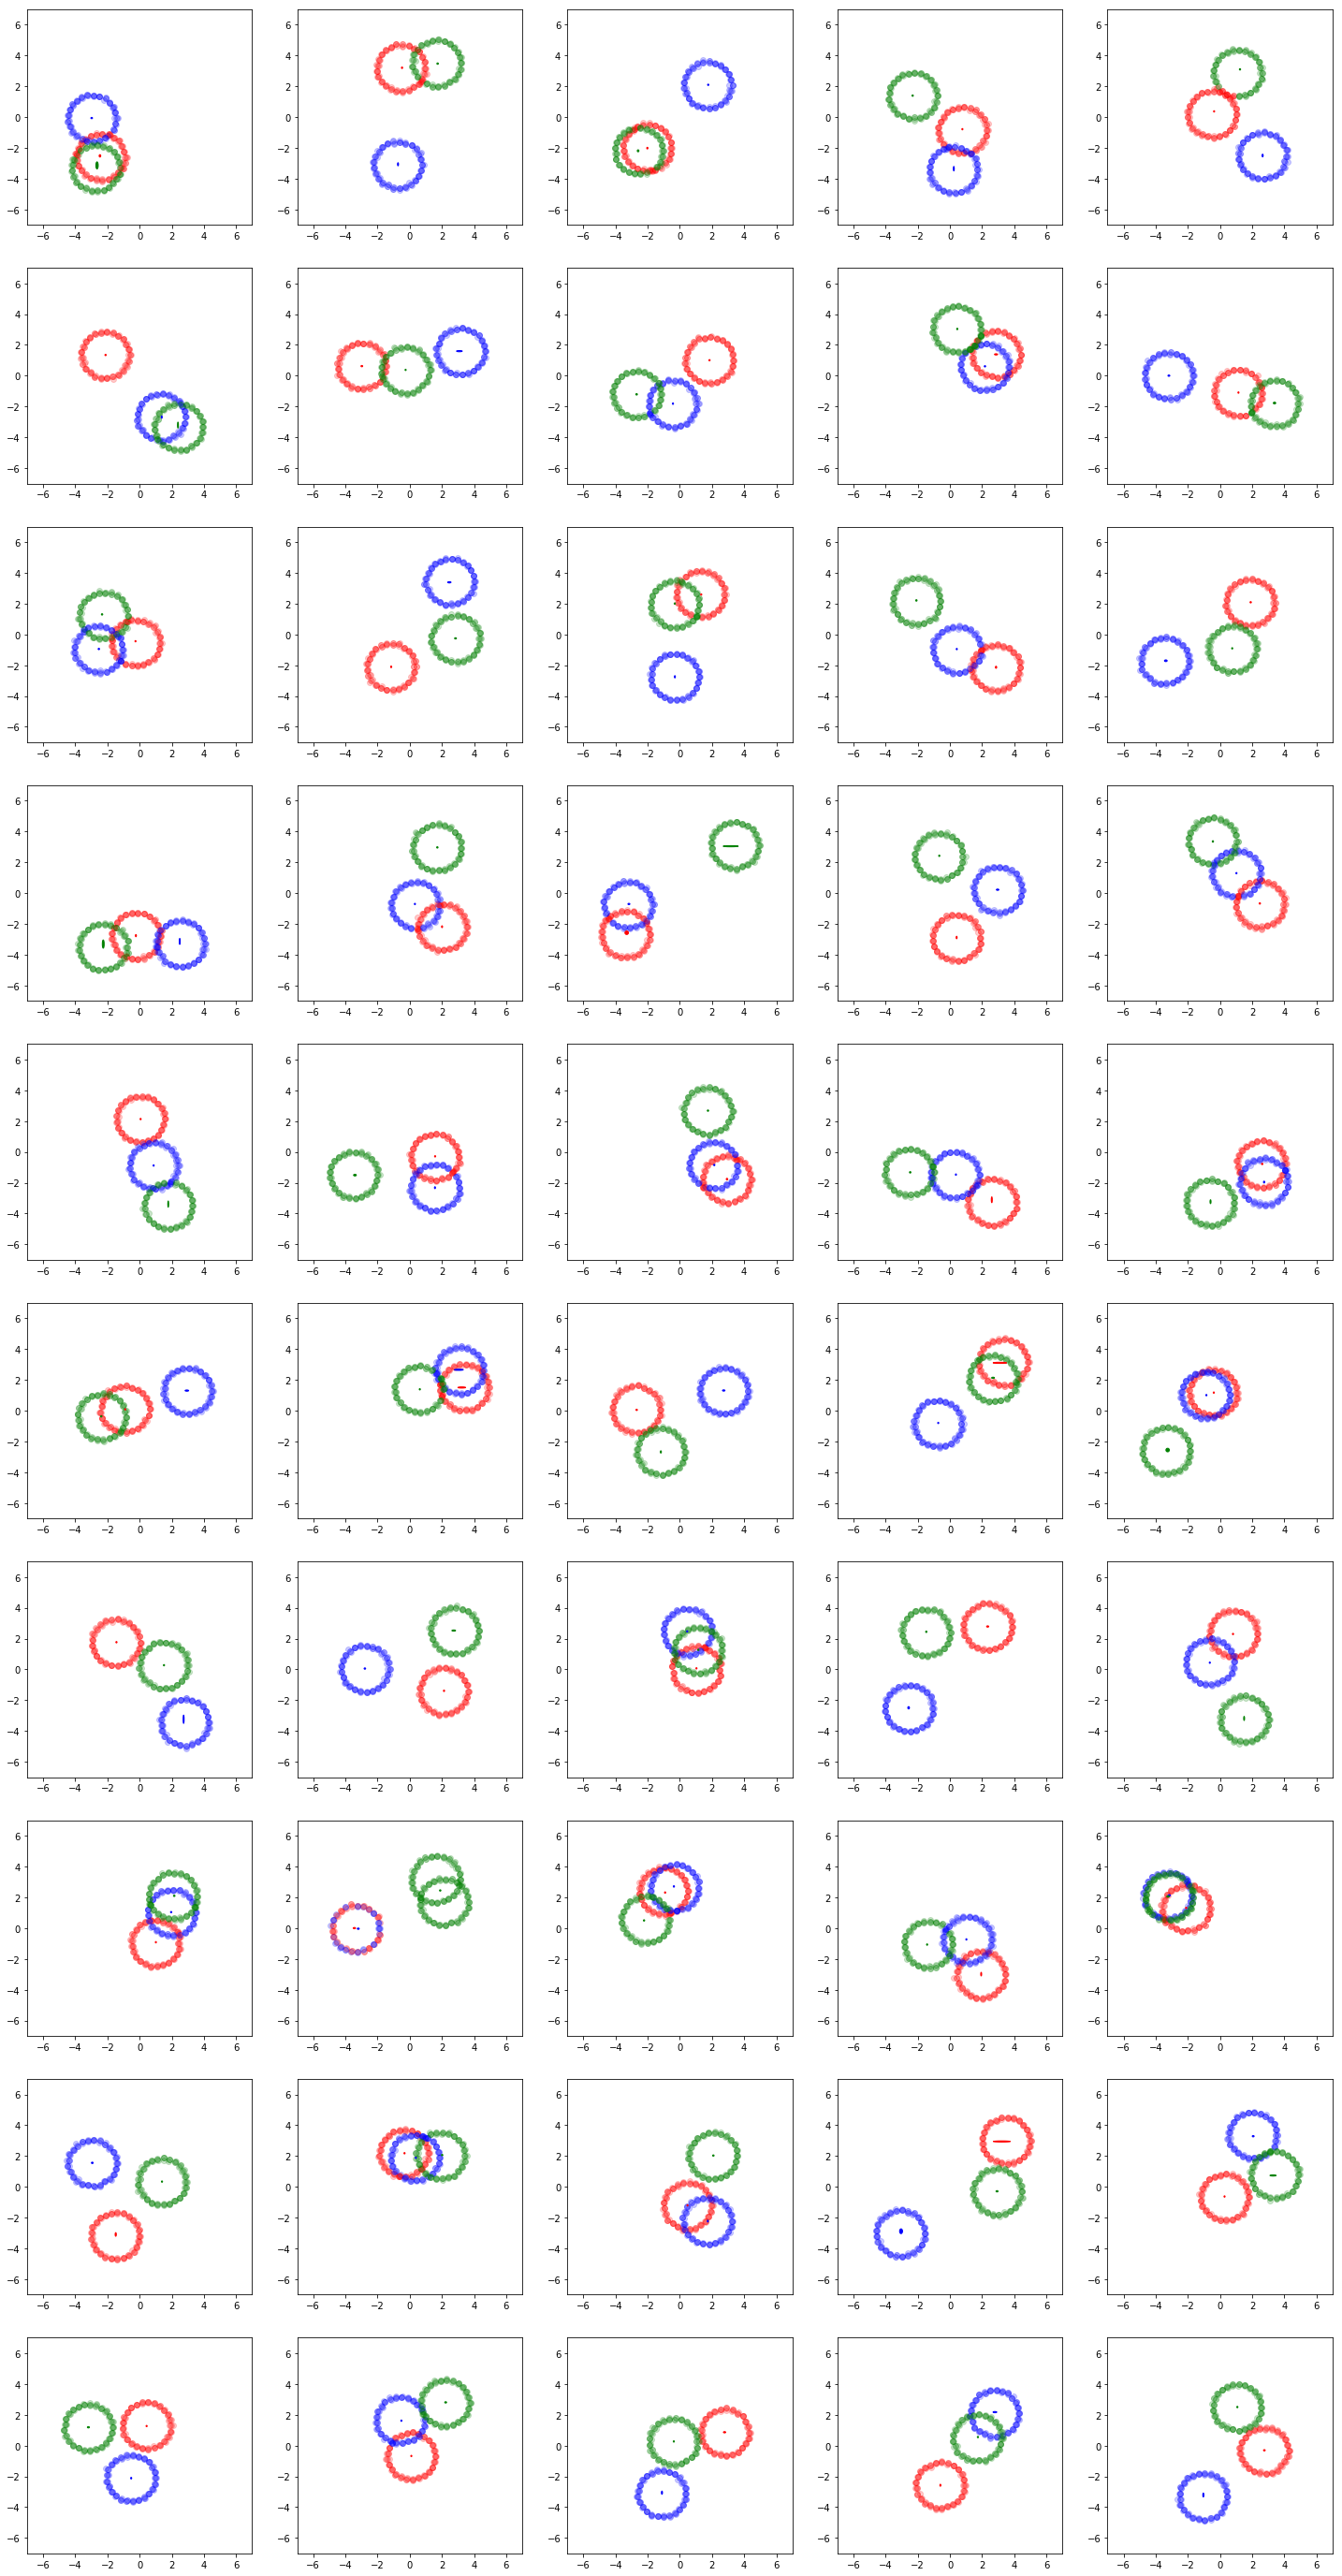

In [10]:
BATCH_SIZE_TEST = 50
obs, q_mu, q_z = test(Eubo_mu, enc_mu, enc_z, Data, FIXED_RADIUS, K, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE_TEST, CUDA, DEVICE)
%time plot_samples(obs, q_mu, q_z, K, PATH)